# Escola de Dados - Python para inovação cívica

Os dados que usaremos nesse notebook pode ser encontrado em: [Candidatos - 2016](https://dadosabertos.tse.jus.br/dataset/candidatos-2016) e [Candidatos - 2020](https://dadosabertos.tse.jus.br/dataset/candidatos-2020-subtemas) disponível no Portal de Dados Abertos do Tribunal Superior Eleitoral.


Os dados também podem ser encontrados na pasta "Dados" deste repositório.


------
Pontos para aula:

- Quantas candidaturas para a Câmara de Vereadores houveram em cada ano agrupado por gênero ? 
- Qual a faixa etária média das pessoas candidatas para a Câmara de Vereadores?
- Há correlação entre idade, gênero e custo da campanha?
- Visualização gráfica da distribuição da variável DS_COR_RACA em 2020

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import glob as gb

In [2]:
path = './base_dados'

uf_choices = ['2016_AP','2016_PA','2020_AP','2020_PA']

dados_ap_pa = []

for choice in uf_choices:
    pattern = f'{path}/consulta_cand_*{choice}.csv'
    for files in gb.glob(pattern):
        if files:
            dados_ap_pa.append(files)
        else:
            print('Arquivo {pattern} não encontrado')

print(dados_ap_pa)

['./base_dados\\consulta_cand_2016_AP.csv', './base_dados\\consulta_cand_2016_PA.csv', './base_dados\\consulta_cand_2020_AP.csv', './base_dados\\consulta_cand_2020_PA.csv']


In [3]:
dados_ap_pa

['./base_dados\\consulta_cand_2016_AP.csv',
 './base_dados\\consulta_cand_2016_PA.csv',
 './base_dados\\consulta_cand_2020_AP.csv',
 './base_dados\\consulta_cand_2020_PA.csv']

In [4]:
lista_df=[]

In [5]:
for dados_estado in dados_ap_pa:
    df_estado = pd.read_csv(dados_estado, sep=';',encoding='latin_1',na_values=['#NULO#'])
    lista_df.append(df_estado)

C:\Users\Luiz\AppData\Local\Temp\ipykernel_5008\694575308.py:2: DtypeWarning: Columns (31,32,33) have mixed types. Specify dtype option on import or set low_memory=False.
  df_estado = pd.read_csv(dados_estado, sep=';',encoding='latin_1',na_values=['#NULO#'])


Para eu consultar se os títulos das colunas de todos os itens da lista (ou seja, cada arquivo .csv) são todos iguais

In [6]:
#Para ver o número de elementos na lista
len(lista_df)

4

In [7]:
lista_df[0].columns == lista_df[3].columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [8]:
lista_df[0].columns == lista_df[1].columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [9]:
lista_df[0].columns == lista_df[2].columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

Agora preciso concaternar os quatro dataframes em um único df:

In [10]:
df_completo = pd.concat(lista_df, axis=0, ignore_index=True)

df_completo.sample(5)

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,...,NR_PROCESSO,CD_SITUACAO_CANDIDATO_PLEITO,DS_SITUACAO_CANDIDATO_PLEITO,CD_SITUACAO_CANDIDATO_URNA,DS_SITUACAO_CANDIDATO_URNA,ST_CANDIDATO_INSERIDO_URNA,NM_TIPO_DESTINACAO_VOTOS,CD_SITUACAO_CANDIDATO_TOT,DS_SITUACAO_CANDIDATO_TOT,ST_PREST_CONTAS
41512,06/05/2023,08:21:53,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,6003580820206140036,-1,NaN,-1,NaN,NÃO,NaN,-1,NaN,N
17945,13/03/2023,15:28:45,2016,2,ELEIÇÃO ORDINÁRIA,1,220,Eleições Municipais 2016,02/10/2016,MUNICIPAL,...,396120166140026,2,DEFERIDO,2,DEFERIDO,SIM,Válido,2,Deferido,S
20970,13/03/2023,15:28:45,2016,2,ELEIÇÃO ORDINÁRIA,1,220,Eleições Municipais 2016,02/10/2016,MUNICIPAL,...,1996220166140034,2,DEFERIDO,2,DEFERIDO,SIM,Válido,2,Deferido,S
34027,06/05/2023,08:21:53,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,6006278620206140023,4,INDEFERIDO COM RECURSO,4,INDEFERIDO COM RECURSO,SIM,Anulado sub judice,4,Indeferido com recurso,S
11446,13/03/2023,15:28:45,2016,2,ELEIÇÃO ORDINÁRIA,1,220,Eleições Municipais 2016,02/10/2016,MUNICIPAL,...,1034420166140035,2,DEFERIDO,2,DEFERIDO,SIM,Válido,2,Deferido,S


In [11]:
df_completo.shape

(48682, 71)

In [12]:
df_completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48682 entries, 0 to 48681
Data columns (total 71 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   DT_GERACAO                     48682 non-null  object 
 1   HH_GERACAO                     48682 non-null  object 
 2   ANO_ELEICAO                    48682 non-null  int64  
 3   CD_TIPO_ELEICAO                48682 non-null  int64  
 4   NM_TIPO_ELEICAO                48682 non-null  object 
 5   NR_TURNO                       48682 non-null  int64  
 6   CD_ELEICAO                     48682 non-null  int64  
 7   DS_ELEICAO                     48682 non-null  object 
 8   DT_ELEICAO                     48682 non-null  object 
 9   TP_ABRANGENCIA                 48682 non-null  object 
 10  SG_UF                          48682 non-null  object 
 11  SG_UE                          48682 non-null  int64  
 12  NM_UE                          48682 non-null 

Quais cargos foram disputados nessas eleições?

In [13]:
df_completo['DS_CARGO'].unique()

array(['VEREADOR', 'PREFEITO', 'VICE-PREFEITO'], dtype=object)

E as situações das candidaturas?

In [14]:
df_completo['DS_DETALHE_SITUACAO_CAND'].unique()

array(['DEFERIDO', 'RENÚNCIA', 'INDEFERIDO', 'NÃO CONHECIMENTO DO PEDIDO',
       'INDEFERIDO COM RECURSO', 'DEFERIDO COM RECURSO', 'CANCELADO',
       'CASSADO COM RECURSO', 'PENDENTE DE JULGAMENTO', 'FALECIDO',
       'CASSADO', 'PEDIDO NÃO CONHECIDO',
       'PEDIDO NÃO CONHECIDO COM RECURSO'], dtype=object)

Selecionando só os vereadores

In [15]:
filtro_cargo = df_completo['DS_CARGO'] == 'VEREADOR'

In [16]:
filtro_deferimento_1 = df_completo['DS_DETALHE_SITUACAO_CAND'] == 'DEFERIDO'

In [17]:
filtro_deferimento_2 = df_completo['DS_DETALHE_SITUACAO_CAND'] == 'DEFERIDO COM RECURSO'

In [18]:
# no pandas a gente usa a versão bitwise dos operadores relacionais, onde and = & e or = |. 
# o comando .copy() serve para criar uma cópia do df não atrelado ao df original

df_vereadores = df_completo[filtro_cargo & (filtro_deferimento_1 | filtro_deferimento_2)].copy()

In [19]:
df_vereadores.shape

(42742, 71)

# Quantas candidaturas de vereadores houveram em cada ano agrupado por gênero ? 

In [20]:
df_raca_genero = df_vereadores[['ANO_ELEICAO','CD_CARGO','SG_UF','NR_PARTIDO','SG_PARTIDO','CD_GENERO',
                               'DS_GENERO','CD_COR_RACA','DS_COR_RACA','NR_IDADE_DATA_POSSE','VR_DESPESA_MAX_CAMPANHA' ]].copy()

In [21]:
df_raca_genero.shape

(42742, 11)

In [22]:
df_raca_genero.head()

,ANO_ELEICAO,CD_CARGO,SG_UF,NR_PARTIDO,SG_PARTIDO,CD_GENERO,DS_GENERO,CD_COR_RACA,DS_COR_RACA,NR_IDADE_DATA_POSSE,VR_DESPESA_MAX_CAMPANHA
0,2016,13,AP,12,PDT,2,MASCULINO,1,BRANCA,25.0,133202.77
1,2016,13,AP,20,PSC,2,MASCULINO,3,PARDA,32.0,10803.91
2,2016,13,AP,23,PPS,2,MASCULINO,1,BRANCA,45.0,133202.77
3,2016,13,AP,25,DEM,2,MASCULINO,3,PARDA,41.0,133202.77
4,2016,13,AP,45,PSDB,4,FEMININO,3,PARDA,38.0,10803.91


In [23]:
agrupamento_ano_genero = df_raca_genero[['ANO_ELEICAO','DS_GENERO','CD_CARGO']].groupby(by=['ANO_ELEICAO','DS_GENERO']).count()

In [24]:
print(agrupamento_ano_genero)

                       CD_CARGO
ANO_ELEICAO DS_GENERO          
2016        FEMININO       6305
            MASCULINO     13348
2020        FEMININO       8021
            MASCULINO     15068


E se eu separasse por estados?

In [25]:
df_raca_genero[['ANO_ELEICAO','DS_GENERO','SG_UF','CD_CARGO']].groupby(by=['ANO_ELEICAO','DS_GENERO','SG_UF']).count()

CD_CARGO
ANO_ELEICAO DS_GENERO SG_UF          
2016        FEMININO  AP          536
                      PA         5769
            MASCULINO AP         1079
                      PA        12269
2020        FEMININO  AP          765
                      PA         7256
            MASCULINO AP         1349
                      PA        13719

In [26]:
type(agrupamento_ano_genero)

pandas.core.frame.DataFrame

Se eu gerar com o as_index=False ele me gera o df com cada linha preenchida, compare com o anterior para ver a diferença:

In [27]:
df_ano_genero = df_raca_genero[['ANO_ELEICAO','DS_GENERO','CD_CARGO']].groupby(by=['ANO_ELEICAO','DS_GENERO'], as_index=False).count()

In [28]:
df_ano_genero

,ANO_ELEICAO,DS_GENERO,CD_CARGO
0,2016,FEMININO,6305
1,2016,MASCULINO,13348
2,2020,FEMININO,8021
3,2020,MASCULINO,15068


<Axes: xlabel='DS_GENERO'>

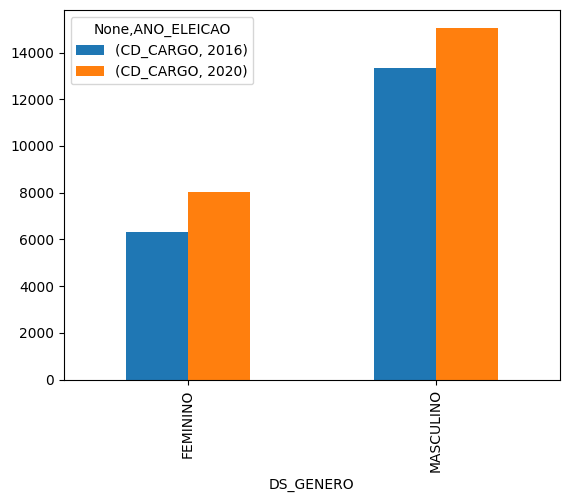

In [29]:
df_ano_genero.groupby(['ANO_ELEICAO','DS_GENERO']).sum().unstack(0).plot(kind='bar')

# Qual a faixa etária média das pessoas candidatas para a Câmara de Vereadores?

In [30]:
df_raca_genero.head()

,ANO_ELEICAO,CD_CARGO,SG_UF,NR_PARTIDO,SG_PARTIDO,CD_GENERO,DS_GENERO,CD_COR_RACA,DS_COR_RACA,NR_IDADE_DATA_POSSE,VR_DESPESA_MAX_CAMPANHA
0,2016,13,AP,12,PDT,2,MASCULINO,1,BRANCA,25.0,133202.77
1,2016,13,AP,20,PSC,2,MASCULINO,3,PARDA,32.0,10803.91
2,2016,13,AP,23,PPS,2,MASCULINO,1,BRANCA,45.0,133202.77
3,2016,13,AP,25,DEM,2,MASCULINO,3,PARDA,41.0,133202.77
4,2016,13,AP,45,PSDB,4,FEMININO,3,PARDA,38.0,10803.91


In [40]:
cortes = [18,24,34,44,54,64,100]

In [37]:
categorias = ['18 a 24','25 a 34','35 a 44','45 a 54','55 a 64','acima de 64']

In [41]:
df_raca_genero['FAIXA_ETARIA'] = pd.cut(df_raca_genero['NR_IDADE_DATA_POSSE'],cortes , labels=categorias)

In [42]:
df_raca_genero.head()

,ANO_ELEICAO,CD_CARGO,SG_UF,NR_PARTIDO,SG_PARTIDO,CD_GENERO,DS_GENERO,CD_COR_RACA,DS_COR_RACA,NR_IDADE_DATA_POSSE,VR_DESPESA_MAX_CAMPANHA,FAIXA_ETARIA
0,2016,13,AP,12,PDT,2,MASCULINO,1,BRANCA,25.0,133202.77,25 a 34
1,2016,13,AP,20,PSC,2,MASCULINO,3,PARDA,32.0,10803.91,25 a 34
2,2016,13,AP,23,PPS,2,MASCULINO,1,BRANCA,45.0,133202.77,45 a 54
3,2016,13,AP,25,DEM,2,MASCULINO,3,PARDA,41.0,133202.77,35 a 44
4,2016,13,AP,45,PSDB,4,FEMININO,3,PARDA,38.0,10803.91,35 a 44


In [44]:
df_raca_genero['FAIXA_ETARIA'].mode()

0    35 a 44
Name: FAIXA_ETARIA, dtype: category
Categories (6, object): ['18 a 24' < '25 a 34' < '35 a 44' < '45 a 54' < '55 a 64' < 'acima de 64']

# Visualize graficamente a distribuição da variável DS_COR_RACA em 2020

In [45]:
df_raca_2020 = df_raca_genero[df_raca_genero['ANO_ELEICAO'] == 2020].copy()

In [46]:
df_raca_2020[['CD_COR_RACA','DS_COR_RACA']].groupby(['DS_COR_RACA']).count()

,CD_COR_RACA
DS_COR_RACA,
AMARELA,56
BRANCA,4032
INDÍGENA,122
NÃO INFORMADO,320
PARDA,16021
PRETA,2538


In [47]:
raca = df_raca_2020['DS_COR_RACA'].unique().tolist()

In [50]:
print(raca)

['PRETA', 'PARDA', 'BRANCA', 'INDÍGENA', 'NÃO INFORMADO', 'AMARELA']


O comando sort=false irá manter o mesmo ordenamento de lista conforme as categorias armazenadas na lista anterior:

In [52]:
frequencia = df_raca_2020['DS_COR_RACA'].value_counts(sort=False).tolist()

In [53]:
print(frequencia)

[2538, 16021, 4032, 122, 320, 56]


<function matplotlib.pyplot.show(close=None, block=None)>

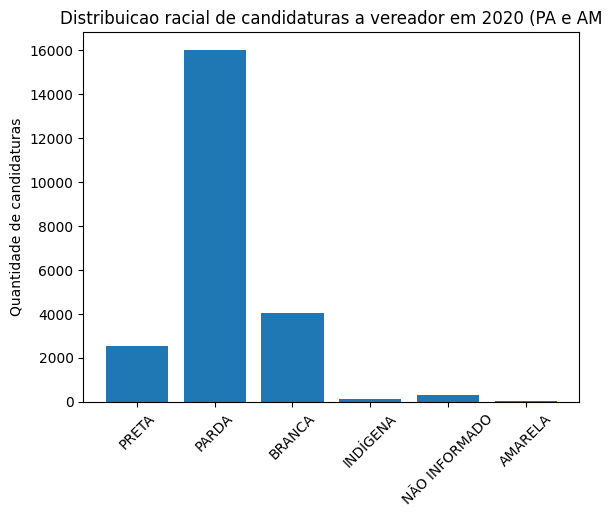

In [55]:
plt.bar(raca, frequencia)
plt.xticks(rotation=45)
plt.title('Distribuicao racial de candidaturas a vereador em 2020 (PA e AM')
plt.ylabel('Quantidade de candidaturas')
plt.show

# Há correlação entre idade, gênero e custo da campanha?

In [56]:
df_raca_genero[['NR_IDADE_DATA_POSSE','CD_GENERO','VR_DESPESA_MAX_CAMPANHA']].corr(method='pearson')

,NR_IDADE_DATA_POSSE,CD_GENERO,VR_DESPESA_MAX_CAMPANHA
NR_IDADE_DATA_POSSE,1.000000,-0.091149,0.071978
CD_GENERO,-0.091149,1.000000,-0.014853
VR_DESPESA_MAX_CAMPANHA,0.071978,-0.014853,1.000000


Sugestão: Biblioteca Seaborn faz um mapa de calor, sugestão olhar para correlações!